In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
training_set.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
training_set.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
def custom_hist(training_set, title,  xlabel, ylabel='Количество', bins=None):
    figsize = (20,6)
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.title(title)
    plt.hist(training_set, int(training_set.max()) if bins is None else bins)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

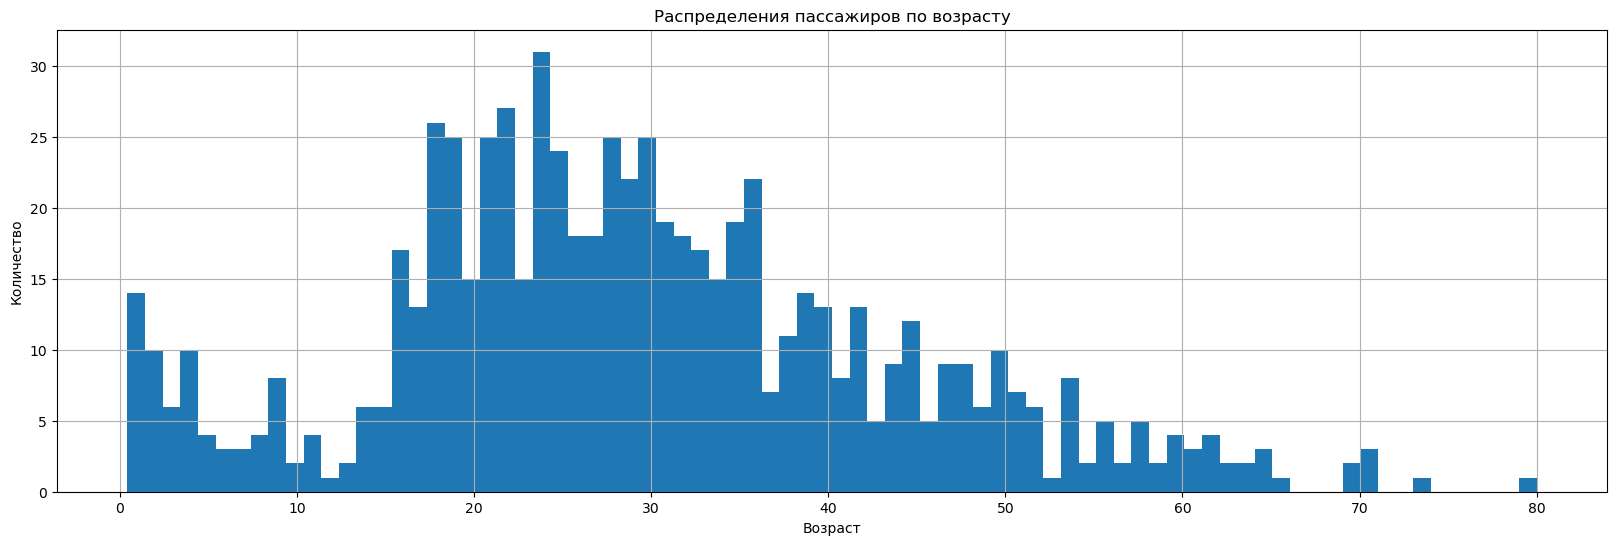

In [ ]:
custom_hist(training_set["Age"], 'Распределения пассажиров по возрасту', 'Возраст')

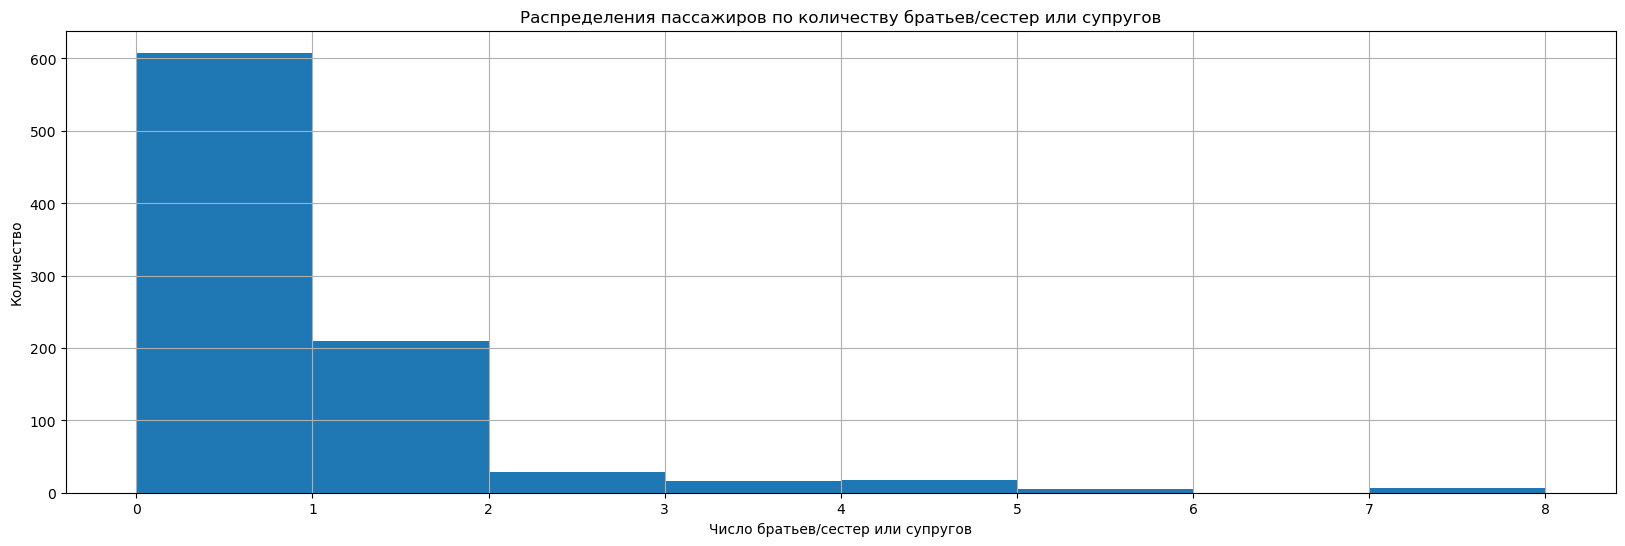

In [ ]:
custom_hist(training_set["SibSp"], 'Распределения пассажиров по количеству братьев/сестер или супругов',
  'Число братьев/сестер или супругов')

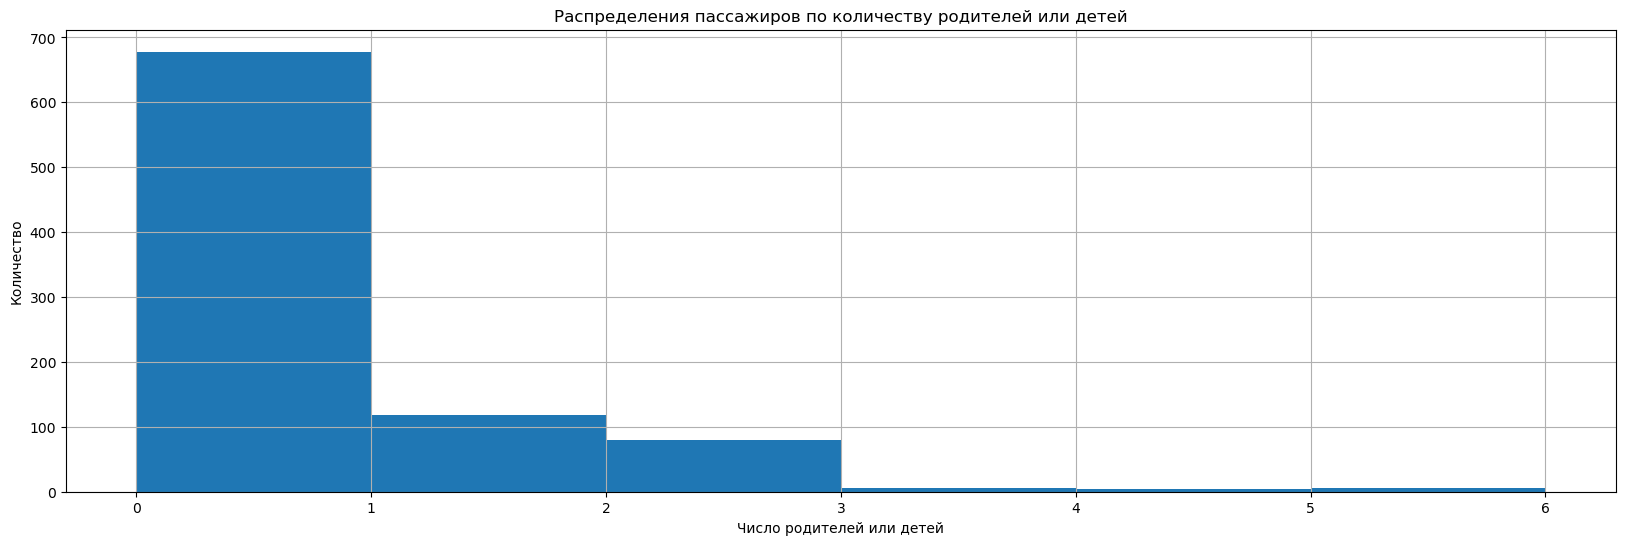

In [ ]:
custom_hist(training_set["Parch"], 'Распределения пассажиров по количеству родителей или детей',
  'Число родителей или детей')

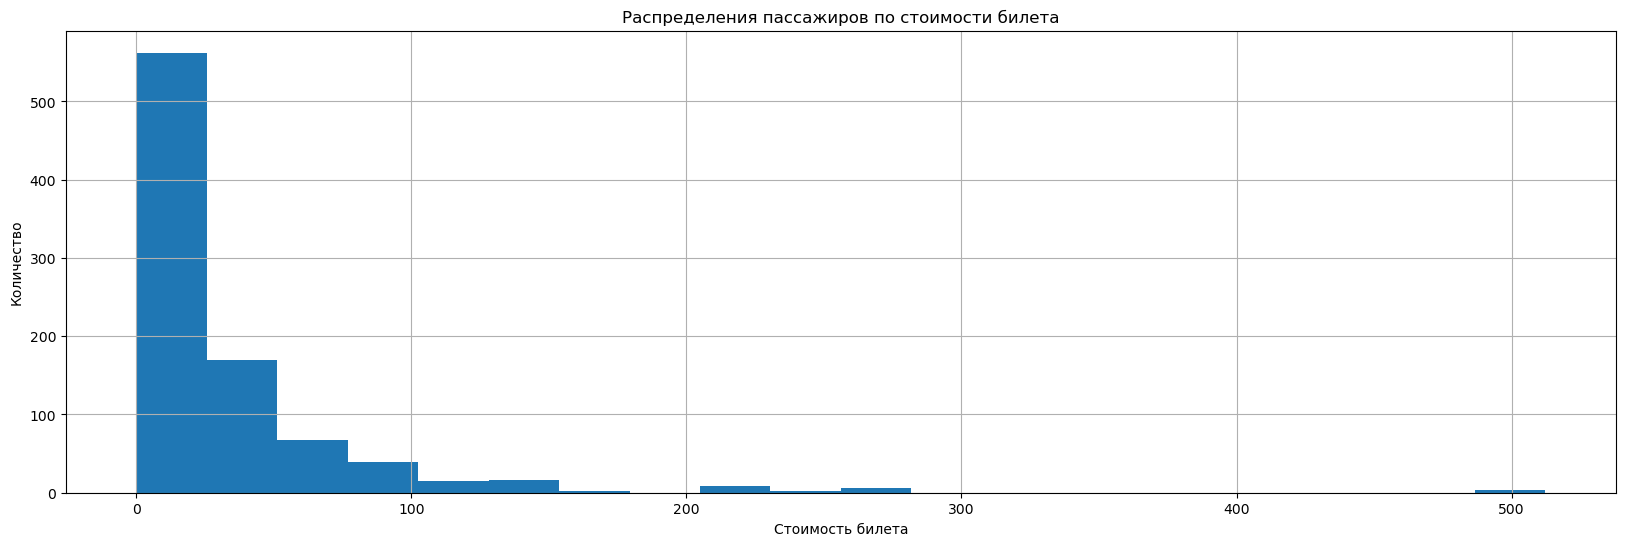

In [ ]:
custom_hist(training_set["Fare"], 'Распределения пассажиров по стоимости билета',
  'Стоимость билета', bins=20)

<AxesSubplot:ylabel='Frequency'>

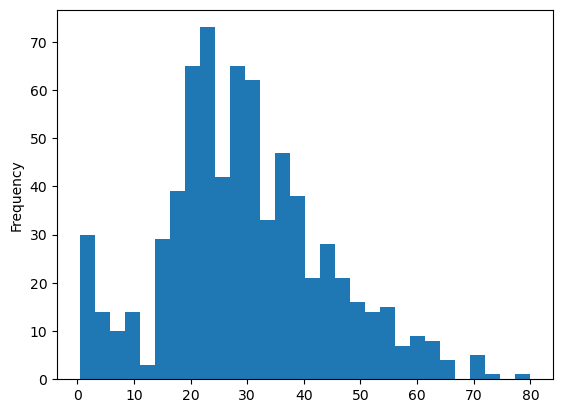

In [ ]:
training_set['Age'].plot.hist(bins=30)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

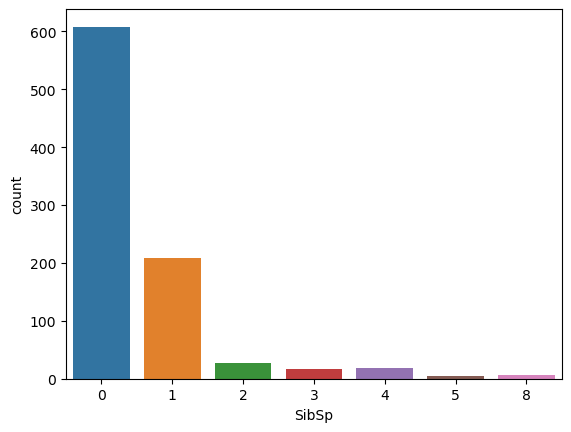

In [ ]:
sns.countplot(x='SibSp', data=training_set)

In [ ]:
training_set['Fare']

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

<AxesSubplot:>

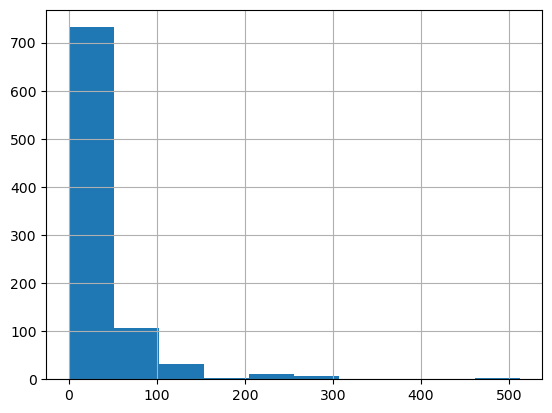

In [ ]:
training_set['Fare'].hist()

<AxesSubplot:>

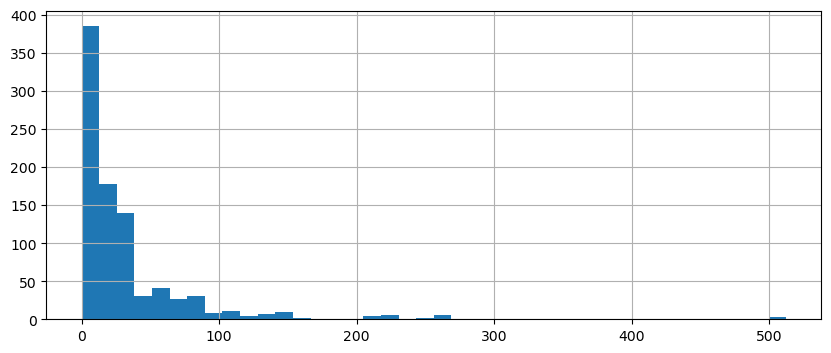

In [ ]:
training_set['Fare'].hist(bins=40, figsize=(10,4))

<AxesSubplot:xlabel='Survived', ylabel='count'>

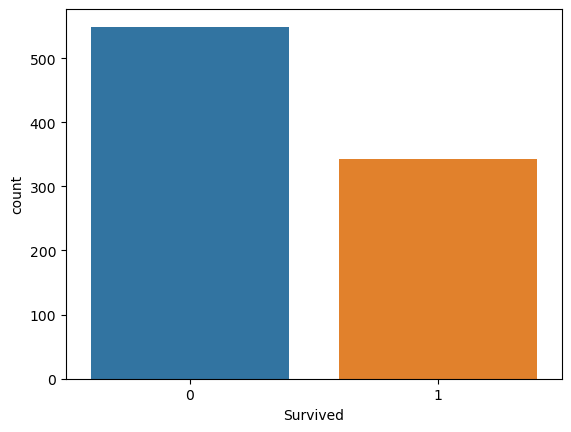

In [ ]:
sns.countplot(x='Survived', data=training_set)

<AxesSubplot:xlabel='Survived', ylabel='count'>

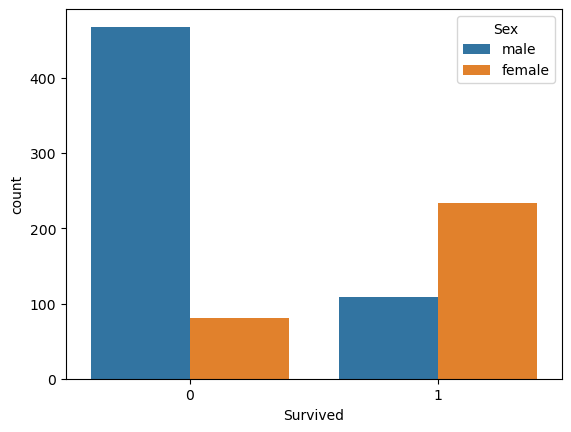

In [ ]:
sns.countplot(x='Survived', data=training_set, hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

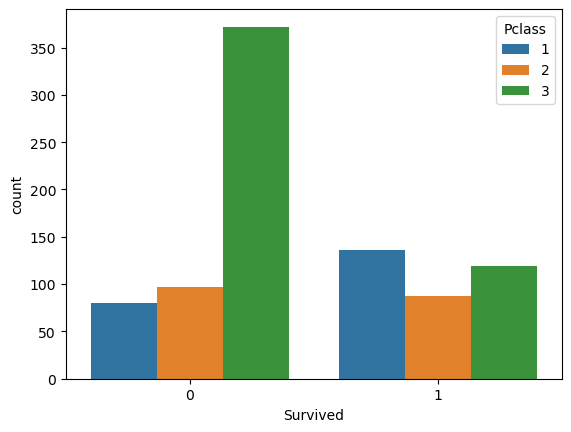

In [ ]:
sns.countplot(x='Survived', data=training_set, hue='Pclass')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

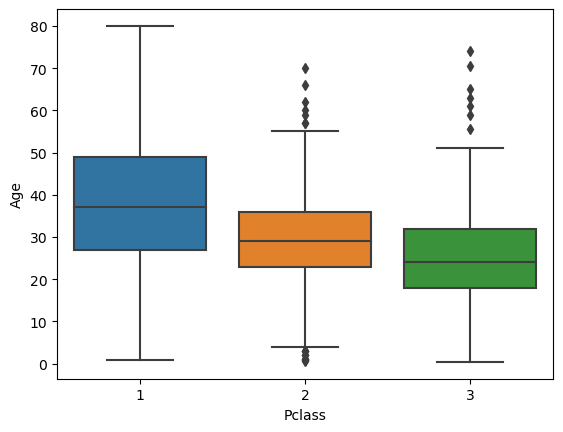

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=training_set)

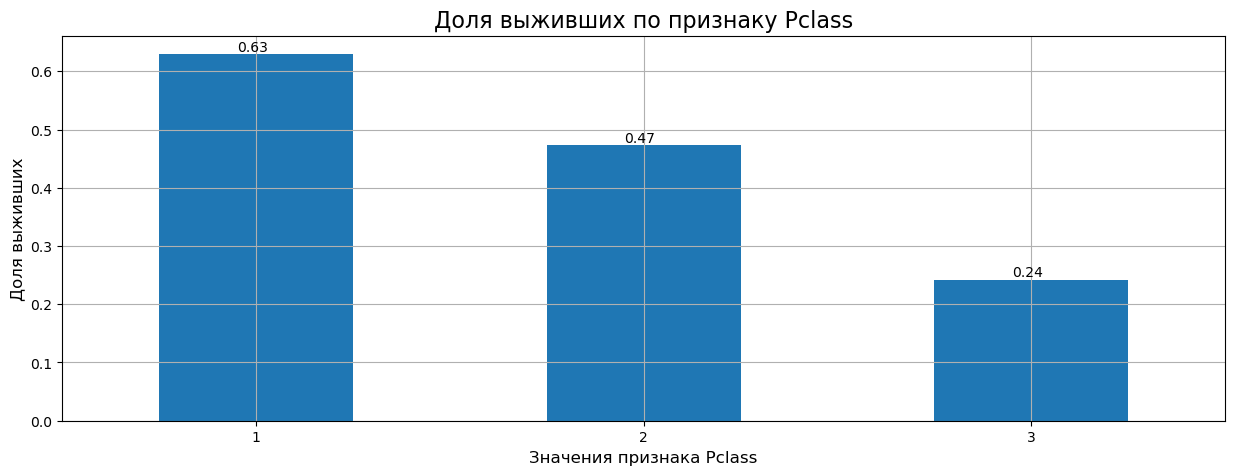

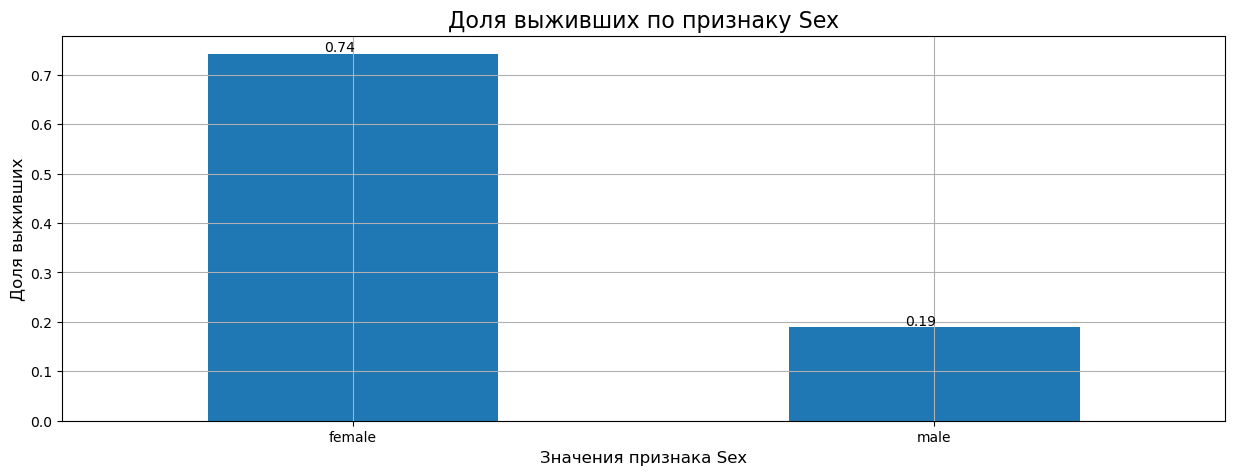

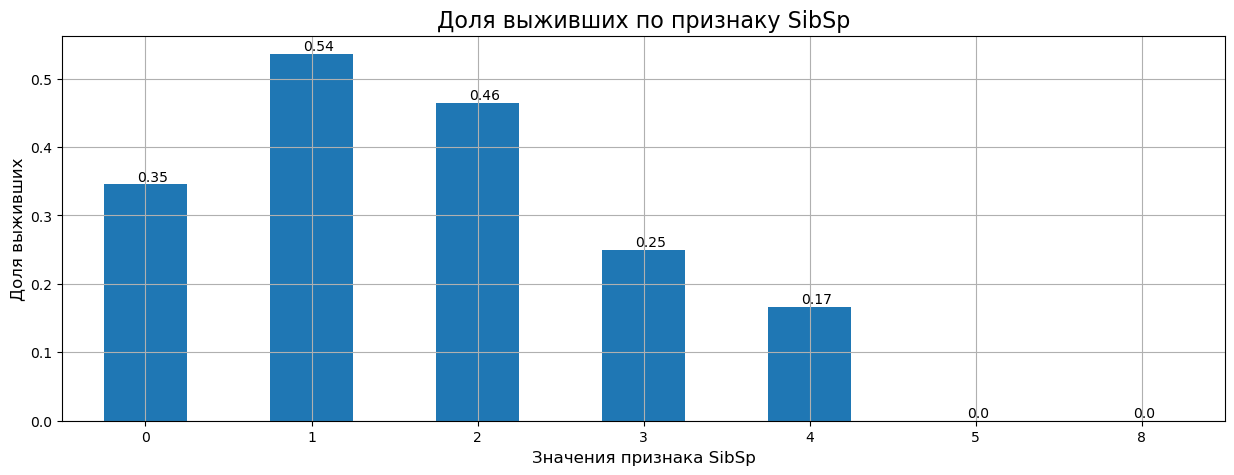

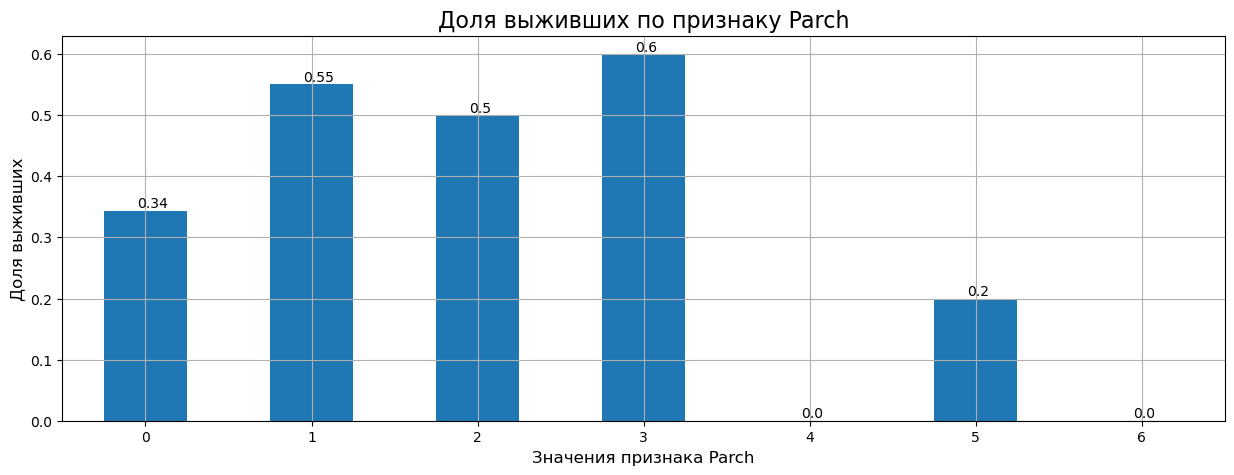

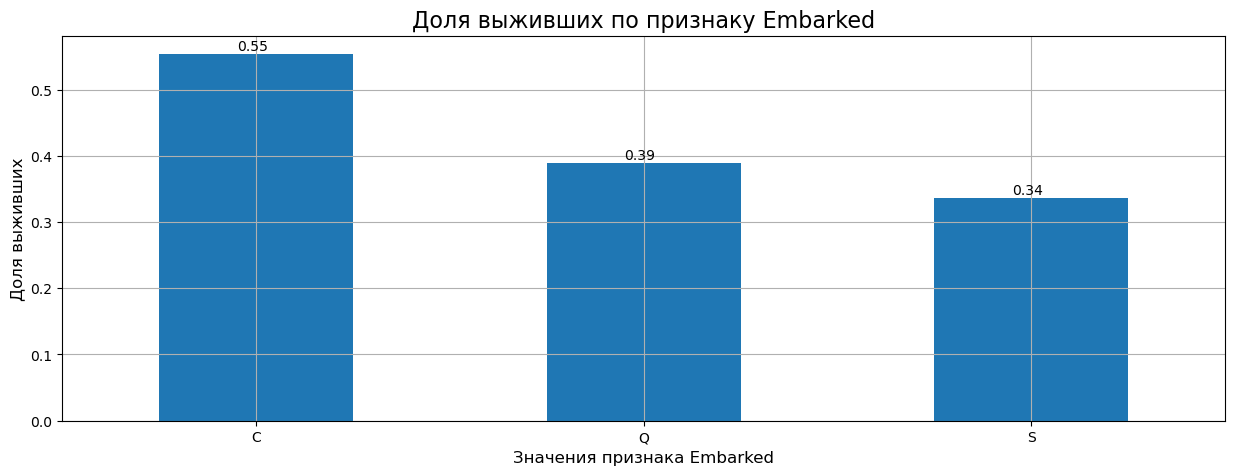

In [ ]:
columns_to_look = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']

for column in columns_to_look:
    pivot = training_set.pivot_table(index=column, values='Survived', aggfunc='mean')

    fig, ax = plt.subplots(figsize=(15,5))
    ax.set_title(f'Доля выживших по признаку {column}', fontdict={'size': 16})
    ax.set_ylabel('Доля выживших', fontdict={'size': 12})
    ax.set_xlabel(column, fontdict={'size': 12})

    for cnt in range(pivot.shape[0]):
        value = pivot.iloc[cnt].values[0]
        ax.text(cnt - .05, value + .005, round(value, 2))

    pivot.plot(kind='bar', rot=0, grid=True, legend=False, ax=ax)
    ax.set_xlabel(f'Значения признака {column}', fontdict={'size': 12})
    plt.show()

In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
training_set.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
training_set.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

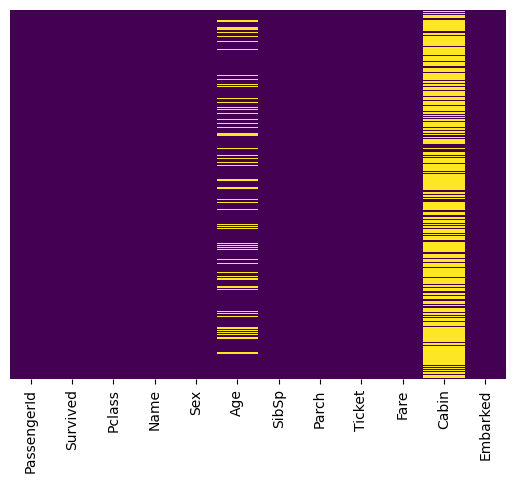

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
training_set.drop('Cabin', axis=1, inplace=True)

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

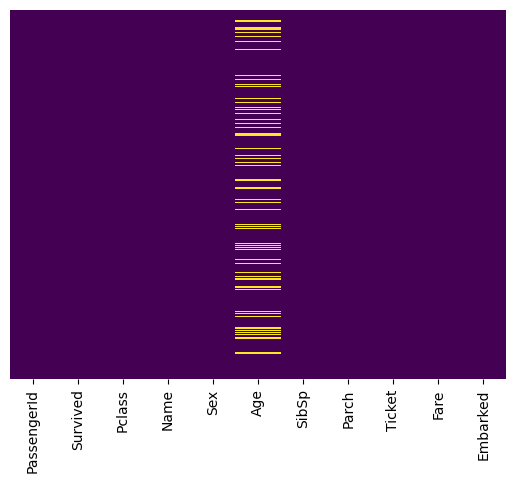

In [ ]:
sns.heatmap(training_set.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [ ]:
training_set.dropna(inplace=True)

In [ ]:
training_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [ ]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(training_set['Sex'])

In [ ]:
training_set['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
np.unique(cat_enc_le)

array([0, 1])

In [ ]:
le.inverse_transform([0,1])

array(['female', 'male'], dtype=object)

In [ ]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(training_set[['Embarked']])  # Вызываем метод fit_transform, возвращает разреженную матрицу из библиотеки Scipy

In [ ]:
training_set.shape

(712, 11)

In [ ]:
cat_enc_ohe.shape

(712, 3)

In [ ]:
pd.get_dummies(training_set['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
885,1,0
886,0,1
887,1,0
889,0,1


In [ ]:
pd.get_dummies(training_set['Sex'], drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
885,0
886,1
887,0
889,1


In [ ]:
sex = pd.get_dummies(training_set['Sex'], drop_first=True)

In [ ]:
embark = pd.get_dummies(training_set['Embarked'], drop_first=True)

In [ ]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
885,1,0
886,0,1
887,0,1
889,0,0


In [ ]:
training_set = pd.concat([training_set, sex, embark], axis=1)

In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [ ]:
training_set.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
training_set.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


**1. Постройте по получившемуся набору данных простую модель машинного обучения и оцените ее эффективность.**

In [ ]:
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
X = training_set.drop('Survived', axis=1)
X

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...
885,3,39.0,0,5,29.1250,0,1,0
886,2,27.0,0,0,13.0000,1,0,1
887,1,19.0,0,0,30.0000,0,0,1
889,1,26.0,0,0,30.0000,1,0,0


In [ ]:
y = training_set['Survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 712, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train set:", accuracy_train)
print("Accuracy on test set:", accuracy_test)

Accuracy on train set: 0.8172690763052208
Accuracy on test set: 0.7990654205607477


**2. Ответьте на следующие вопросы при помощи визуализации и численных данных по исходному набору данных:**

**3. Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?**

0    424
1    288
Name: Survived, dtype: int64


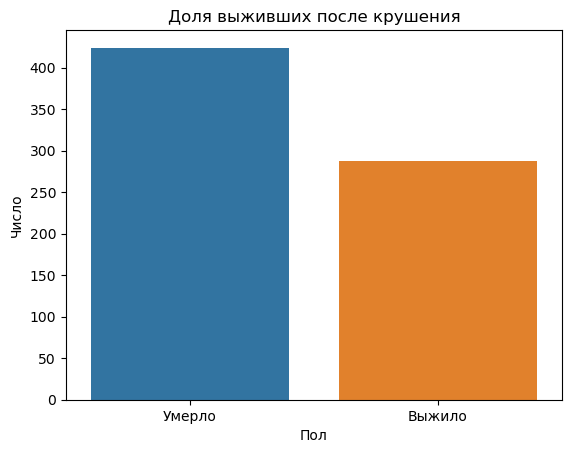

In [ ]:
survived_count = training_set['Survived'].value_counts()
print(survived_count)
labels = ['Умерло', 'Выжило']

sns.barplot(x=labels, y=survived_count)
plt.title('Доля выживших после крушения')
plt.xlabel('Пол')
plt.ylabel('Число')
plt.show()

0    195
1     93
Name: male, dtype: int64


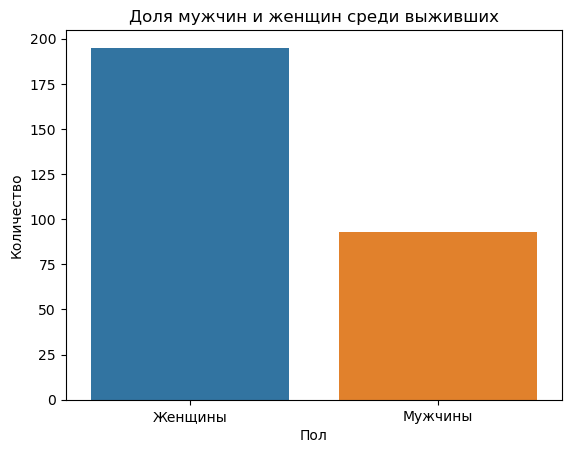

In [ ]:
gender_count = training_set[training_set['Survived'] == 1]['male'].value_counts()
print(gender_count)
gender_labels = ['Женщины', 'Mужчины']

sns.barplot(x=gender_labels, y=gender_count)
plt.title('Доля мужчин и женщин среди выживших')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

**4. Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?**

3    355
1    184
2    173
Name: Pclass, dtype: int64


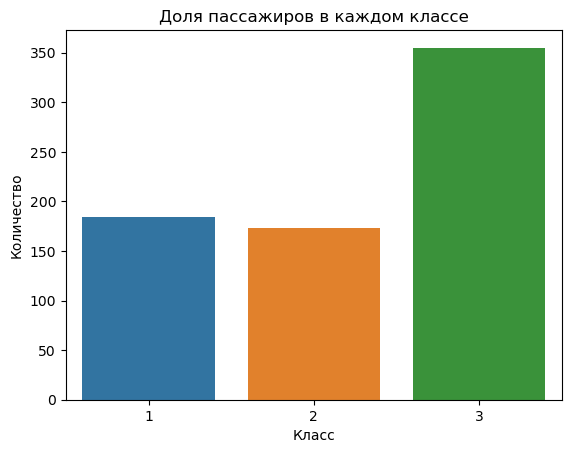

In [ ]:
passanger_count = training_set['Pclass'].value_counts()
print(passanger_count)

sns.barplot(x=passanger_count.index, y=passanger_count)
plt.title('Доля пассажиров в каждом классе')
plt.xlabel('Класс')
plt.ylabel('Количество')
plt.show()

1    253
0    102
Name: male, dtype: int64


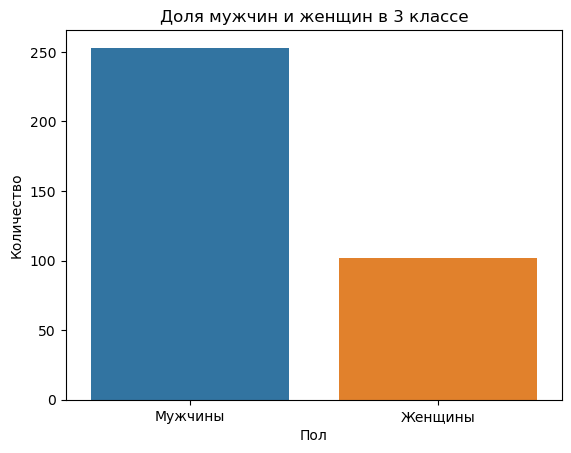

In [ ]:
passanger_count_3 = training_set[training_set['Pclass'] == 3]['male'].value_counts()
print(passanger_count_3)

sns.barplot(x=['Мужчины', 'Женщины'], y=passanger_count_3)
plt.title('Доля мужчин и женщин в 3 классе')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.show()

**5. Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.**

In [ ]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


**6. Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение диаграммы рассеяния).**

In [ ]:
correlation = training_set['Fare'].corr(training_set['Age'])

print(f"Коэффициент корреляции Пирсона: {correlation}")

Коэффициент корреляции Пирсона: 0.09314251789411516


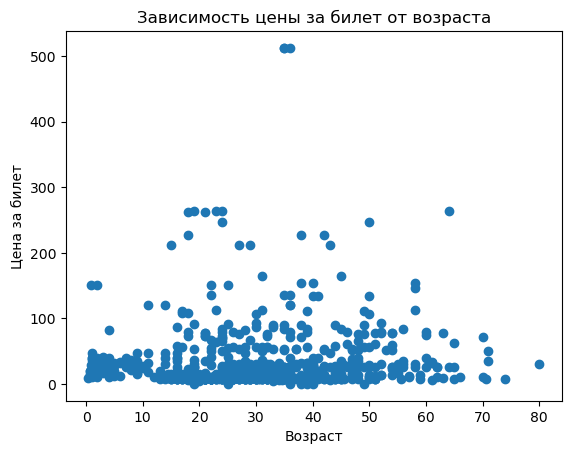

In [ ]:
plt.scatter(training_set['Age'], training_set['Fare'])
plt.xlabel('Возраст')
plt.ylabel('Цена за билет')
plt.title('Зависимость цены за билет от возраста')
plt.show()

Очень слабая линейная связь между ценой за билет и возрастом пассажира

**7. Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?**

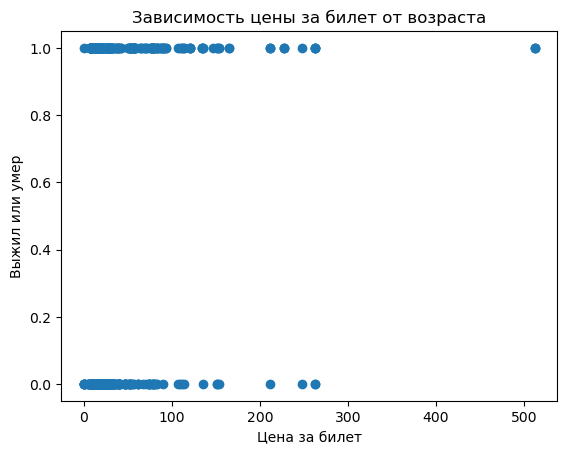

In [ ]:
plt.scatter(training_set['Fare'], training_set['Survived'])
plt.xlabel('Цена за билет')
plt.ylabel('Выжил или умер')
plt.title('Зависимость цены за билет от возраста')
plt.show()

Из этой диаграммы рассеяния ничего непонятно

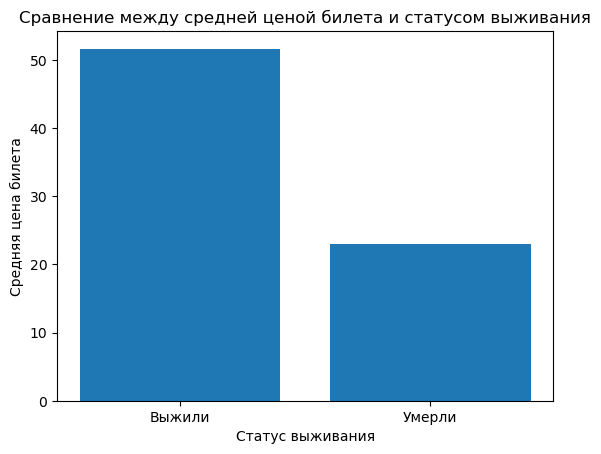

In [ ]:
# Создание двух подмножеств данных для выживших и невыживших пассажиров
ticket_prices_survived = training_set[training_set['Survived'] == 1]['Fare']
ticket_prices_not_survived = training_set[training_set['Survived'] == 0]['Fare']

# Построение столбчатой диаграммы
plt.bar(['Выжили', 'Умерли'], [ticket_prices_survived.mean(), ticket_prices_not_survived.mean()])
plt.xlabel('Статус выживания')
plt.ylabel('Средняя цена билета')
plt.title('Сравнение между средней ценой билета и статусом выживания')
plt.show()


Survived    0    1
Pclass            
1          64  120
2          90   83
3         270   85


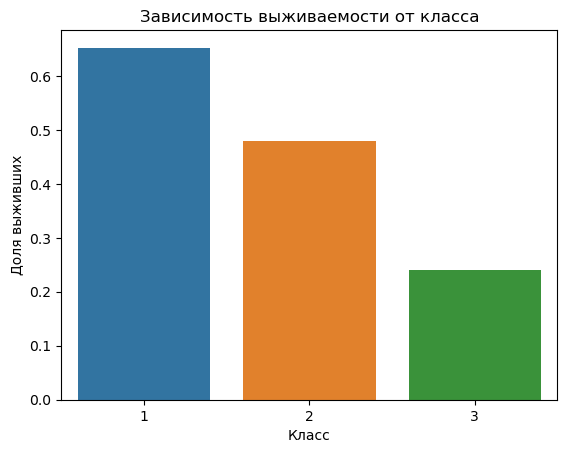

In [ ]:
# Группировка данных по классу пассажиров и выживаемости
grouped_data = training_set.groupby(['Pclass', 'Survived']).size().unstack()
print(grouped_data)
# Вычисление доли выживших в каждом классе
grouped_data['Survival Rate'] = grouped_data[1] / (grouped_data[0] + grouped_data[1])
# Построение столбчатой диаграммы
sns.barplot(x=grouped_data.index, y='Survival Rate', data=grouped_data)
plt.xlabel('Класс')
plt.ylabel('Доля выживших')
plt.title('Зависимость выживаемости от класса')
plt.show()

**8. Какова связь между стоимостью билета и портом отправления? Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне.**

In [ ]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
embarked = pd.Series(ohe.inverse_transform(cat_enc_ohe).flatten())
embarked

0      S
1      C
2      S
3      S
4      S
      ..
707    Q
708    S
709    S
710    C
711    Q
Length: 712, dtype: object

In [ ]:
embarked.index = training_set['Fare'].index

In [ ]:
df = pd.DataFrame({'Embarked': embarked, 'Fare': training_set['Fare']})
df

,Embarked,Fare
0,S,7.2500
1,C,71.2833
2,S,7.9250
3,S,53.1000
4,S,8.0500
...,...,...
885,Q,29.1250
886,S,13.0000
887,S,30.0000
889,C,30.0000


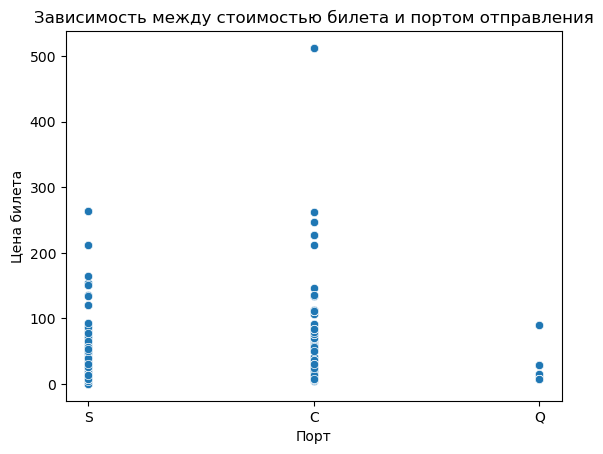

In [ ]:
sns.scatterplot(x='Embarked', y='Fare', data=df)
plt.xlabel('Порт')
plt.ylabel('Цена билета')
plt.title('Зависимость между стоимостью билета и портом отправления')
plt.show()

  Embarked       Fare
0        C  68.296767
1        Q  18.265775
2        S  27.476284


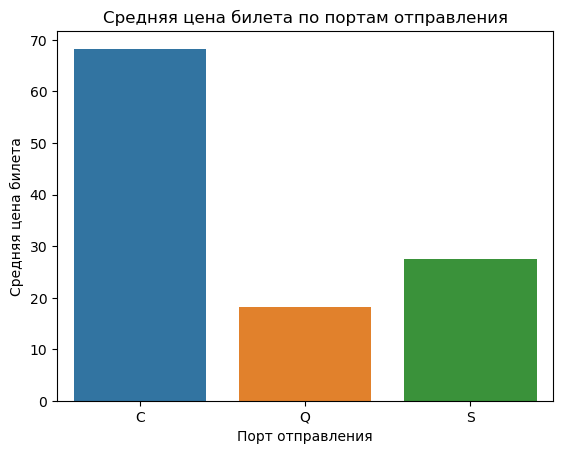

In [ ]:
mean_fare_by_embarked = df.groupby('Embarked')['Fare'].mean().reset_index()
print(mean_fare_by_embarked)
sns.barplot(x='Embarked', y='Fare', data=mean_fare_by_embarked)
plt.xlabel('Порт отправления')
plt.ylabel('Средняя цена билета')
plt.title('Средняя цена билета по портам отправления')
plt.show()


In [ ]:
fare_min = training_set['Fare'].min()
print("Минимальная цена: ", fare_min)

fare_mean = training_set['Fare'].mean()
print("Средняя цена: ", fare_mean)

fare_max = training_set['Fare'].max()
print("Максимальная цена: ", fare_max)

Минимальная цена:  0.0
Средняя цена:  34.56725140449432
Максимальная цена:  512.3292


In [ ]:
#1 вариант
fare_min = training_set[training_set['S'] == 1]['Fare'].min()
print("Минимальная цена в Саутгемптоне: ", fare_min)

fare_mean = training_set[training_set['S'] == 1]['Fare'].mean()
print("Средняя цена в Саутгемптоне: ", fare_mean)

fare_max = training_set[training_set['S'] == 1]['Fare'].max()
print("Максимальная цена в Саутгемптоне: ", fare_max)

Минимальная цена в Саутгемптоне:  0.0
Средняя цена в Саутгемптоне:  27.476284476534268
Максимальная цена в Саутгемптоне:  263.0


In [ ]:
#2 вариант
fare_min = df[df['Embarked'] == 'S']['Fare'].min()
print("Минимальная цена в Саутгемптоне: ", fare_min)

fare_mean = df[df['Embarked'] == 'S']['Fare'].mean()
print("Средняя цена в Саутгемптоне: ", fare_mean)

fare_max = df[df['Embarked'] == 'S']['Fare'].max()
print("Максимальная цена в Саутгемптоне: ", fare_max)

Минимальная цена в Саутгемптоне:  0.0
Средняя цена в Саутгемптоне:  27.476284476534268
Максимальная цена в Саутгемптоне:  263.0


**9. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.**

In [ ]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
df['Pclass'] = training_set['Pclass']
df

,Embarked,Fare,Pclass
0,S,7.2500,3
1,C,71.2833,1
2,S,7.9250,3
3,S,53.1000,1
4,S,8.0500,3
...,...,...,...
885,Q,29.1250,3
886,S,13.0000,2
887,S,30.0000,1
889,C,30.0000,1


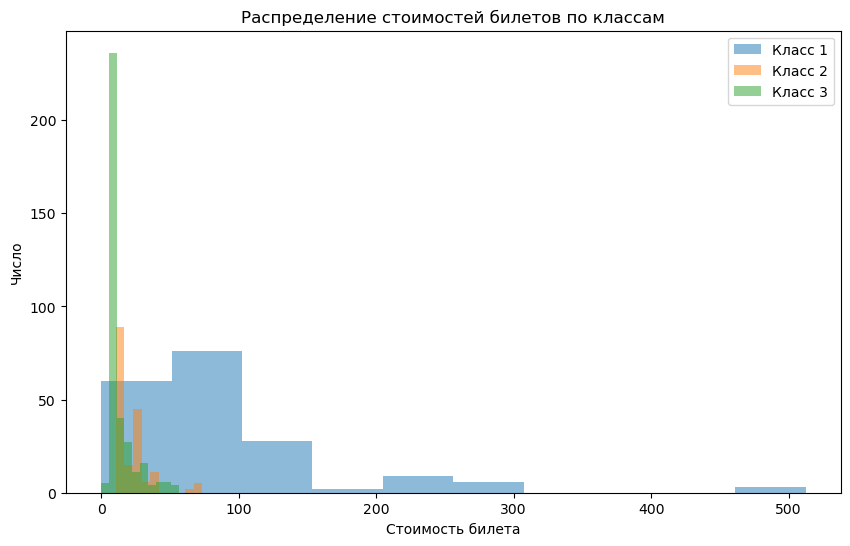

In [ ]:
class1_fares = df[df['Pclass'] == 1]['Fare']
class2_fares = df[df['Pclass'] == 2]['Fare']
class3_fares = df[df['Pclass'] == 3]['Fare']

plt.figure(figsize=(10, 6))
plt.hist(class1_fares, bins=10, alpha=0.5, label='Класс 1')
plt.hist(class2_fares, bins=10, alpha=0.5, label='Класс 2')
plt.hist(class3_fares, bins=10, alpha=0.5, label='Класс 3')

plt.xlabel('Стоимость билета')
plt.ylabel('Число')
plt.title('Распределение стоимостей билетов по классам')

plt.legend()
plt.show()

**10. Оцените репрезентативность представленной выборки. Сколько всего было пассажиров Титаника? Сколько из них выжило? Какую долю составляет представленный набор данных от всей генеральной совокупности?**

In [ ]:
tr_set = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023_new/ML5.4%20EDA/titanic.csv')
tr_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print(f'Всего на Титанике был {len(tr_set["PassengerId"])} пассажир')

Всего на Титанике был 891 пассажир


In [ ]:
print(training_set[training_set['Survived'] == 1]['Survived'].sum())
print(training_set['Survived'].value_counts())

288
0    424
1    288
Name: Survived, dtype: int64


In [ ]:
print('Выжило ' + str(tr_set[tr_set['Survived'] == 1]['Survived'].sum()) + ' человека')

Выжило 342 человека


**11. Разделите выборку на тестовую и обучающую части при помощи train_test_split(). Изобразите на графиках распределение некоторых атрибутов и целевой переменной. Насколько однородно получившееся разбиение?**

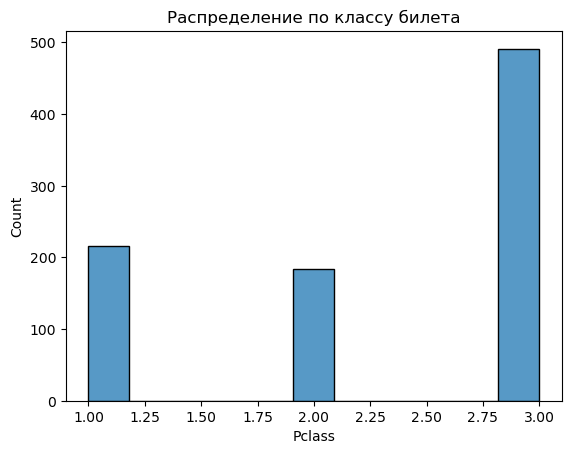

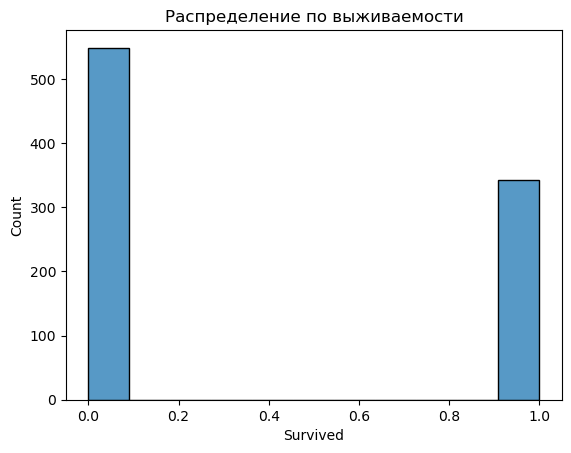

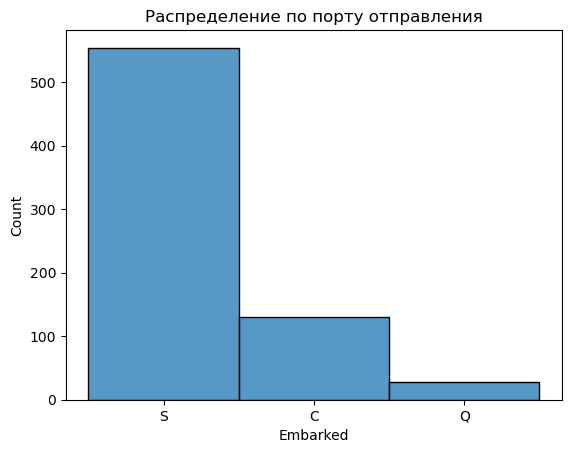

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sns.histplot(data=tr_set, x='Pclass')
plt.title('Распределение по классу билета')
plt.show()

sns.histplot(data=tr_set, x='Survived')
plt.title('Распределение по выживаемости')
plt.show()

sns.histplot(data=df, x='Embarked')
plt.title('Распределение по порту отправления')
plt.show()

**12. Сбалансируйте классы в исходном датасете двумя способами:**

**13. Удалите лишние объекты мажоритарного класса (выбранные случайно)**

In [ ]:
majority_class = tr_set['Survived'].value_counts().idxmax()
minority_class = tr_set['Survived'].value_counts().idxmin()

majority_indices = tr_set[tr_set['Survived'] == majority_class].index
print(majority_class, minority_class)

random_majority_indices = np.random.choice(majority_indices, size=int(0.5 * len(majority_indices)), replace=False)

df_majority_removed = tr_set.drop(random_majority_indices)
df_majority_removed

0 1


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df_majority_removed['Survived'].value_counts()

1    342
0    275
Name: Survived, dtype: int64

**14. Добавьте в выборку дубликаты миноритарного класса.**

In [ ]:
df_minority = tr_set[tr_set['Survived'] == minority_class]

k = 50
duplicates = df_minority.sample(n=k, replace=True)

df_minority_add = pd.concat([tr_set, duplicates])
df_minority_add

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
558,559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.6500,E67,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
328,329,1,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S


**15. Проведите исследование эффективности простой модели классификации до и после данных преобразований.**

In [ ]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
df_majority_removed

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [ ]:
df_minority_add

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.00,0,0,7598,8.0500,NaN,S
133,134,1,2,"Weisz, Mrs. Leopold (Mathilde Francoise Pede)",female,29.00,1,0,228414,26.0000,NaN,S
209,210,1,1,"Blank, Mr. Henry",male,40.00,0,0,112277,31.0000,A31,C


In [ ]:
#обрабатываем Датает с удаленными объектами
df_majority_removed.drop('Cabin', axis=1, inplace=True)
df_majority_removed.dropna(inplace=True)
cat_enc_le = le.fit_transform(df_majority_removed['Sex'])
cat_enc_ohe = ohe.fit_transform(df_majority_removed[['Embarked']])
sex = pd.get_dummies(df_majority_removed['Sex'], drop_first=True)
embark = pd.get_dummies(df_majority_removed['Embarked'], drop_first=True)
df_majority_removed = pd.concat([df_majority_removed, sex, embark], axis=1)
df_majority_removed.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
df_majority_removed

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
6,0,1,54.0,0,0,51.8625,1,0,1
...,...,...,...,...,...,...,...,...,...
879,1,1,56.0,0,1,83.1583,0,0,0
880,1,2,25.0,0,1,26.0000,0,0,1
885,0,3,39.0,0,5,29.1250,0,1,0
887,1,1,19.0,0,0,30.0000,0,0,1


In [ ]:
#обрабатываем Датает с добавленными объектами
df_minority_add.drop('Cabin', axis=1, inplace=True)
df_minority_add.dropna(inplace=True)
cat_enc_le = le.fit_transform(df_minority_add['Sex'])
cat_enc_ohe = ohe.fit_transform(df_minority_add[['Embarked']])
sex = pd.get_dummies(df_minority_add['Sex'], drop_first=True)
embark = pd.get_dummies(df_minority_add['Embarked'], drop_first=True)
df_minority_add = pd.concat([df_minority_add, sex, embark], axis=1)
df_minority_add.drop(['Sex', 'Embarked', 'Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [ ]:
df_minority_add

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.00,1,0,7.2500,1,0,1
1,1,1,38.00,1,0,71.2833,0,0,0
2,1,3,26.00,0,0,7.9250,0,0,1
3,1,1,35.00,1,0,53.1000,0,0,1
4,0,3,35.00,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
644,1,3,0.75,2,1,19.2583,0,0,0
338,1,3,45.00,0,0,8.0500,1,0,1
133,1,2,29.00,1,0,26.0000,0,0,1
209,1,1,40.00,0,0,31.0000,1,0,0


In [ ]:
#Исходная
X = training_set.drop('Survived', axis=1)
y = training_set['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train set before:", accuracy_train)
print("Accuracy on test set before:", accuracy_test)

Accuracy on train set before: 0.8172690763052208
Accuracy on test set before: 0.7990654205607477


In [ ]:
#Модель где удалены объекты мажоритарного класса
X = df_majority_removed.drop('Survived', axis=1)
y = df_majority_removed['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_2 = LogisticRegression(max_iter=1000)
model_2.fit(X_train, y_train)

y_pred_train = model_2.predict(X_train)
y_pred_test = model_2.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train set before:", accuracy_train)
print("Accuracy on test set before:", accuracy_test)

Accuracy on train set before: 0.7971428571428572
Accuracy on test set before: 0.74


In [ ]:
#Модель где добавлены дубликаты миноритарного класса
X = df_minority_add.drop('Survived', axis=1)
y = df_minority_add['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model_3 = LogisticRegression(max_iter=1000)
model_3.fit(X_train, y_train)

y_pred_train = model_3.predict(X_train)
y_pred_test = model_3.predict(X_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy on train set before:", accuracy_train)
print("Accuracy on test set before:", accuracy_test)

Accuracy on train set before: 0.7917414721723519
Accuracy on test set before: 0.7740585774058577


**16. Постройте корреляционную матрицу признаков после преобразования данных. Сделайте вывод о наличии либо отсутствии мультиколлинеарности признаков.**

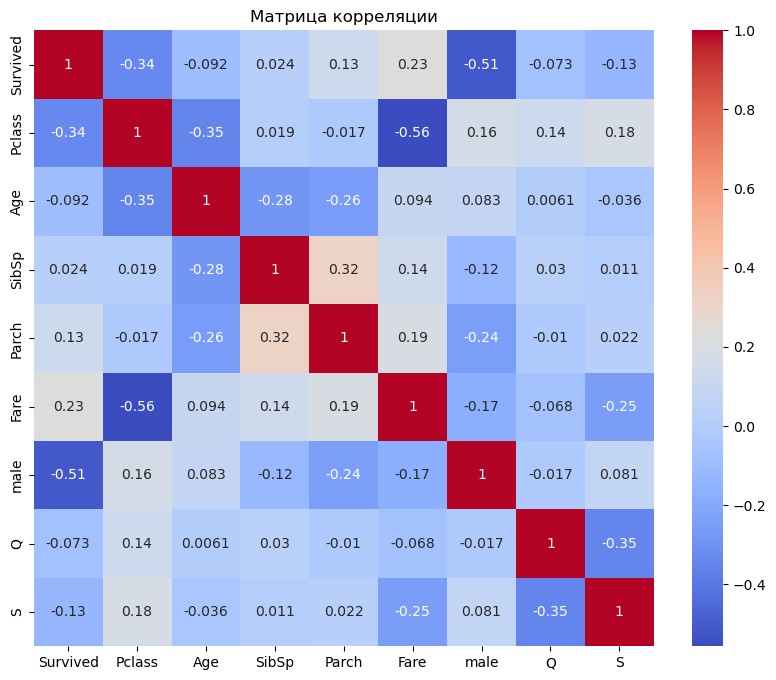

In [ ]:
#для датасета откуда удалены объекты
correlation_matrix = df_majority_removed.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

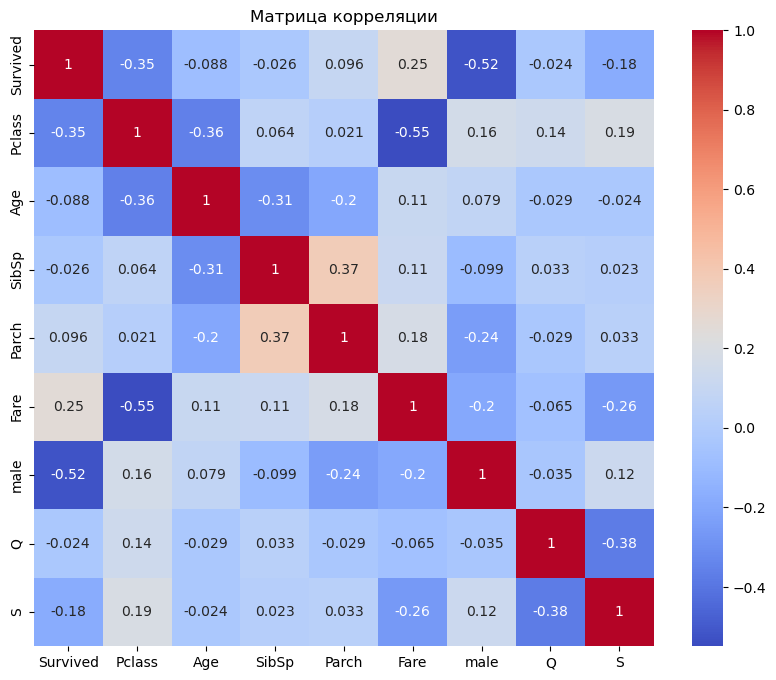

In [ ]:
#для датасета в который добавлены дубликаты
correlation_matrix = df_minority_add.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

**17. Проведите группировку данных по значению возраста. Введите новый признак "возрастная категория", значениями которой будут "ребенок", "взрослый", "старик". Проведите анализ эффективности данного признака.**

In [ ]:
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0
886,0,2,27.0,0,0,13.0000,1,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
889,1,1,26.0,0,0,30.0000,1,0,0


In [ ]:
def get_age_category(age):
    if age < 18:
        return "child"
    elif age >= 18 and age < 65:
        return "adult"
    else:
        return "old people"

# Создание нового признака "возрастная категория"
training_set['Age Group'] = training_set['Age'].apply(get_age_category)
training_set

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Age Group
0,0,3,22.0,1,0,7.2500,1,0,1,adult
1,1,1,38.0,1,0,71.2833,0,0,0,adult
2,1,3,26.0,0,0,7.9250,0,0,1,adult
3,1,1,35.0,1,0,53.1000,0,0,1,adult
4,0,3,35.0,0,0,8.0500,1,0,1,adult
...,...,...,...,...,...,...,...,...,...,...
885,0,3,39.0,0,5,29.1250,0,1,0,adult
886,0,2,27.0,0,0,13.0000,1,0,1,adult
887,1,1,19.0,0,0,30.0000,0,0,1,adult
889,1,1,26.0,0,0,30.0000,1,0,0,adult


<AxesSubplot:xlabel='Age Group', ylabel='count'>

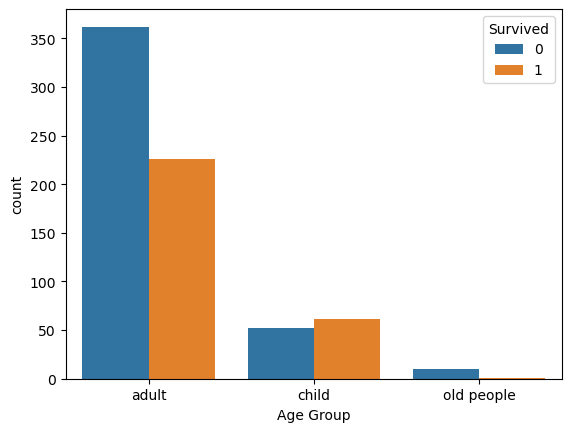

In [ ]:
# Анализ распределения целевой переменной по возрастным категориям
sns.countplot(x='Age Group', hue='Survived', data=training_set)